In [13]:
import pandas as pd
from sklearn import preprocessing
import graphviz 
from sklearn import tree

In [14]:
# Data courtesy of John Burn-Murdoch @ FT: https://twitter.com/jburnmurdoch/status/1332241350062972933
# df=pd.read_csv('English tiers and Covid-19 metrics - Raw data.csv')
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1Y_ryQWzjOYZR2F3g6dI1xyGKFhJZWARCH7TXxWGYzM8/export?format=csv')
df=df.dropna()
df.head()

,area_code,area_name,tier,Cases rate,Cases growth rate,Cases among those aged 60+,Covid-19 hospital bed occupancy,24H Covid-19 hospital admissions,Positivity rate
0,E07000113,Swale,Tier 3,535.707,0.865,353.8,28.524,5.466,17.417
1,E07000114,Thanet,Tier 3,493.933,0.954,322.2,15.925,2.403,11.648
2,E06000010,"Kingston upon Hull, City of",Tier 3,490.804,0.651,418.3,31.361,3.135,15.026
3,E07000137,East Lindsey,Tier 3,443.811,0.778,537.1,42.858,4.344,14.757
4,E06000021,Stoke-on-Trent,Tier 3,434.520,0.762,358.0,47.786,5.776,12.759


In [15]:
features=['Cases rate','Cases growth rate',	'Cases among those aged 60+',	'Covid-19 hospital bed occupancy',	'24H Covid-19 hospital admissions','Positivity rate']
classes=['Tier1','Tier2','Tier3']


X=df[features]

In [16]:
Y=df['tier']
enc = preprocessing.LabelEncoder()
Y=enc.fit_transform(Y)
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

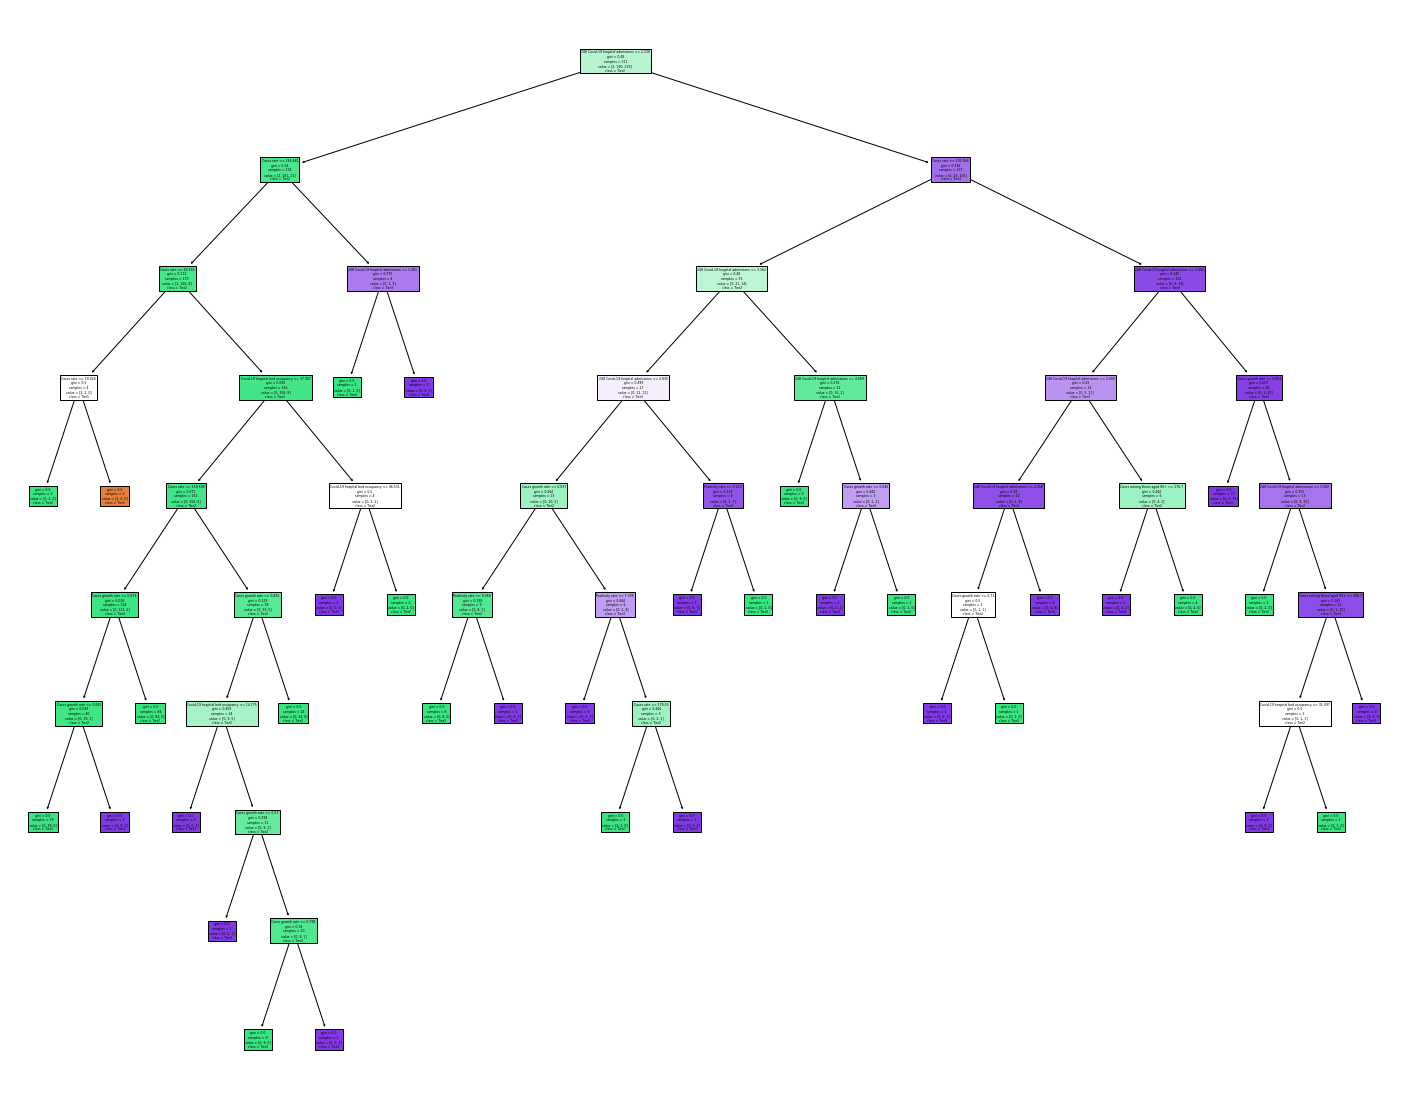

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=classes,
                   filled=True)


In [19]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X)
print(classification_report(Y, y_pred, target_names=classes))

              precision    recall  f1-score   support

       Tier1       1.00      1.00      1.00         2
       Tier2       1.00      1.00      1.00       190
       Tier3       1.00      1.00      1.00       119

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X, Y)
# RandomForestClassifier(...)
# >>> print(clf.predict([[0, 0, 0, 0]]))

RandomForestClassifier(max_depth=4, random_state=0)

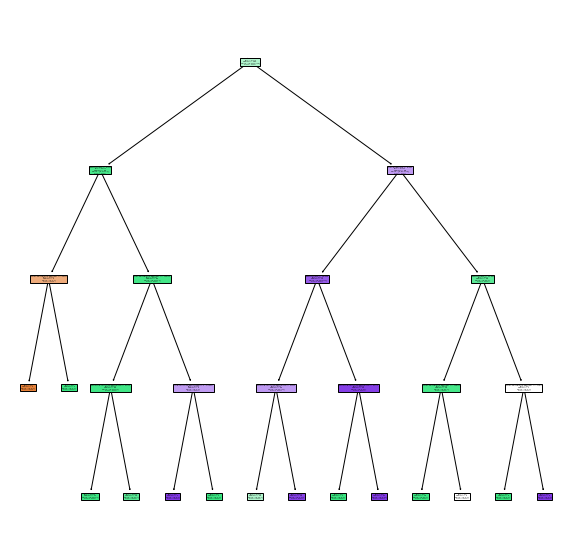

In [25]:
fn=features
cn=classes
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')